In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# for significance testing
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, pearsonr

In [2]:
# Read the data
df = pd.read_excel('https://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/data1_en.xlsx')

# Textual values of variables
gender = ['Men', 'Women']
education = ['Comprehensive school', 'Secondary level', 'University degree', 'Master degree']
satisfaction = ['very unsatisfied', 'unsatisfied', 'no opinion', 'satisfied', 'very satisfied']

# Class boundaries for age classification
age_groups = [19, 29, 39, 49, 59, 69]

# Crosstabulation - two categorical variables

In [4]:
df1 = pd.crosstab(df['management'], df['sex'])
df1.index = satisfaction
df1.columns = gender
df1.index.name = 'satisfaction on management'
df1

,Men,Women
satisfaction on management,,
very unsatisfied,7,0
unsatisfied,15,1
no opinion,23,7
satisfied,15,8
very satisfied,3,3


In [5]:
# chi-square test to calculate p-value
chi2_contingency(df1)

(8.853002675771554,
 0.06488059279438793,
 4,
 array([[ 5.37804878,  1.62195122],
        [12.29268293,  3.70731707],
        [23.04878049,  6.95121951],
        [17.67073171,  5.32926829],
        [ 4.6097561 ,  1.3902439 ]]))

Relationship between sex and satisfaction on management is not significant
because p-value 0.06 is greater than 0.05.

Text(0, 0.5, 'number of responses')

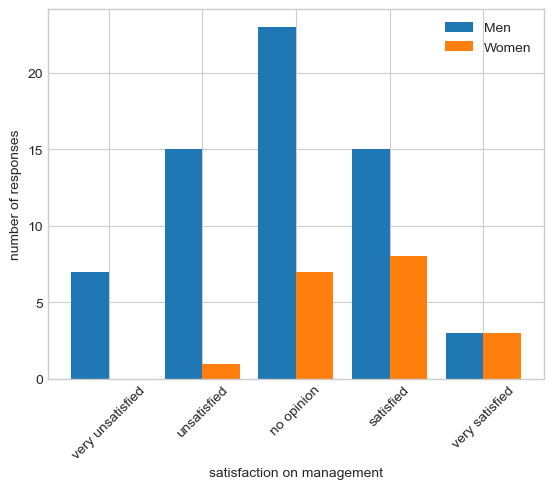

In [9]:
df1.plot.bar(rot=45, width=0.8)
plt.ylabel('number of responses')

In [22]:
df2 = pd.crosstab(df['management'], df['sex'], normalize='columns')*100
df2.index = satisfaction
df2.columns = gender
df2.style.format('{:.2f} %', decimal=',').background_gradient(cmap='Reds')

,Men,Women
very unsatisfied,"11,11 %","0,00 %"
unsatisfied,"23,81 %","5,26 %"
no opinion,"36,51 %","36,84 %"
satisfied,"23,81 %","42,11 %"
very satisfied,"4,76 %","15,79 %"


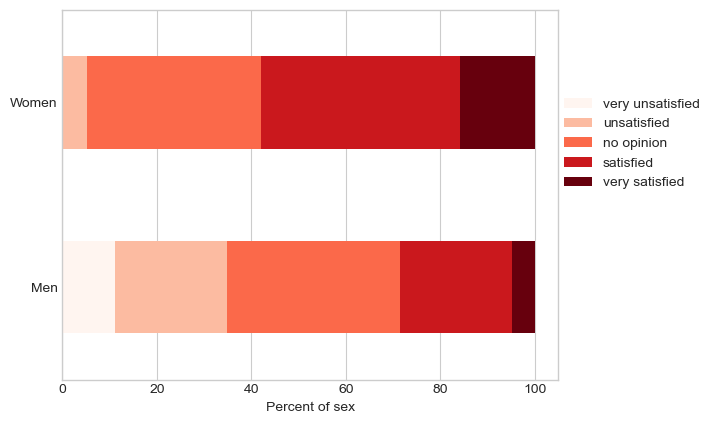

In [27]:
df2.T.plot.barh(stacked=True, cmap='Reds')
plt.xlabel('Percent of sex')
plt.grid(axis='y')
plt.legend(loc=(1, 0.5))

# Crosstabulation - quantitative and categorical variables

In [33]:
df['age_group'] = pd.cut(df['age'], bins=age_groups)

df3 = pd.crosstab(df['age_group'], df['sex'], normalize='index')*100
df3.columns = gender
df3.style.format('{:.1f} %')

,Men,Women
age_group,,
"(19, 29]",94.1 %,5.9 %
"(29, 39]",76.7 %,23.3 %
"(39, 49]",69.6 %,30.4 %
"(49, 59]",63.6 %,36.4 %
"(59, 69]",100.0 %,0.0 %


# Descriptive statistics - categorical and quantitative variables

In [38]:
df4 = df.groupby('education')['salary'].describe()
df4.index = education
df4.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Comprehensive school,27,2310,473,1638,2008,2144,2534,3587
Secondary level,30,2403,534,1521,2008,2378,2729,3510
University degree,22,2887,1108,1559,2222,2710,2925,6278
Master degree,2,5147,110,5069,5108,5147,5186,5225


([<matplotlib.axis.XTick at 0x1e6aefdd550>,
 [Text(0, 0, 'Comprehensive school'),
  Text(1, 0, 'Secondary level'),
  Text(2, 0, 'University degree'),
  Text(3, 0, 'Master degree')])

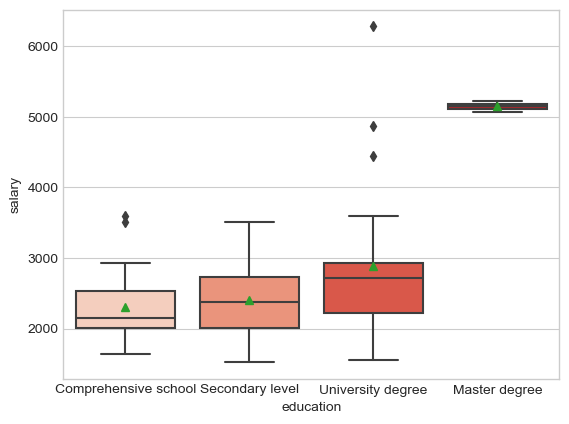

In [66]:
sns.boxplot(data=df, x='education', y='salary', showmeans=True, palette='Reds')
plt.xticks(ticks=[0, 1, 2, 3], labels=education)

In [50]:
# Is there significant difference between salaries for men and women?
# Let's define two groups (salaries for men and salaries for women):
s1 = df['salary'][df['sex']==1] # salaries for men
s2 = df['salary'][df['sex']==2] # salaries for women

# t-test p-value
ttest_ind(s1, s2, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=3.0597612743474714, pvalue=0.003048272029697872)

Difference is significant because p-value 0.003 is less than 0.05.

Is there significant difference in salaries between different education-levels

In [52]:
df_dropna = df.dropna(subset=['salary'])

e1 = df_dropna['salary'][df_dropna['education']==1] # comprehensive school
e2 = df_dropna['salary'][df_dropna['education']==2] # secondary school
e3 = df_dropna['salary'][df_dropna['education']==3] # university level
e4 = df_dropna['salary'][df_dropna['education']==4] # master level

f_oneway(e1, e2, e3, e4)

F_onewayResult(statistic=11.675086950951924, pvalue=2.186573534680074e-06)

There are significant differences because p-value 0.000002 is less than 0.05.

# Correlation - two quantitative variables

In [53]:
hatco = pd.read_excel('https://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/hatco.xlsx')
hatco

,id,Delivery Speed,Price Level,Price Flexibility,Manufacturer Image,Service,Salesforce Image,Product Quality,Satisfaction Level,Firm size,Usage level %,Industry type,Buying situation
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,4.2,0,32,1,1
1,2,1.8,3.0,6.3,6.6,2.5,4.0,8.4,4.3,1,43,0,1
2,3,3.4,5.2,5.7,6.0,4.3,2.7,8.2,5.2,1,48,1,2
3,4,2.7,1.0,7.1,5.9,1.8,2.3,7.8,3.9,1,32,1,1
4,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,6.8,0,58,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.6,1.6,6.4,5.0,0.7,2.1,8.4,3.4,1,25,1,1
96,97,6.1,0.5,9.2,4.8,3.3,2.8,7.1,5.2,0,60,1,3
97,98,2.0,2.8,5.2,5.0,2.4,2.7,8.4,3.7,1,38,0,1
98,99,3.1,2.2,6.7,6.8,2.6,2.9,8.4,4.3,1,42,0,1


In [54]:
hatco1 = hatco.loc[:, 'Delivery Speed':'Satisfaction Level']
hatco1

,Delivery Speed,Price Level,Price Flexibility,Manufacturer Image,Service,Salesforce Image,Product Quality,Satisfaction Level
0,4.1,0.6,6.9,4.7,2.4,2.3,5.2,4.2
1,1.8,3.0,6.3,6.6,2.5,4.0,8.4,4.3
2,3.4,5.2,5.7,6.0,4.3,2.7,8.2,5.2
3,2.7,1.0,7.1,5.9,1.8,2.3,7.8,3.9
4,6.0,0.9,9.6,7.8,3.4,4.6,4.5,6.8
...,...,...,...,...,...,...,...,...
95,0.6,1.6,6.4,5.0,0.7,2.1,8.4,3.4
96,6.1,0.5,9.2,4.8,3.3,2.8,7.1,5.2
97,2.0,2.8,5.2,5.0,2.4,2.7,8.4,3.7
98,3.1,2.2,6.7,6.8,2.6,2.9,8.4,4.3


<AxesSubplot:>

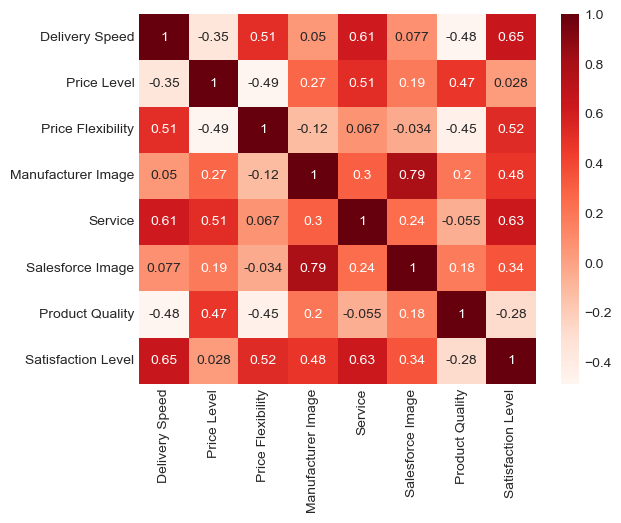

In [70]:
sns.heatmap(hatco1.corr(), annot=True, cmap='Reds')

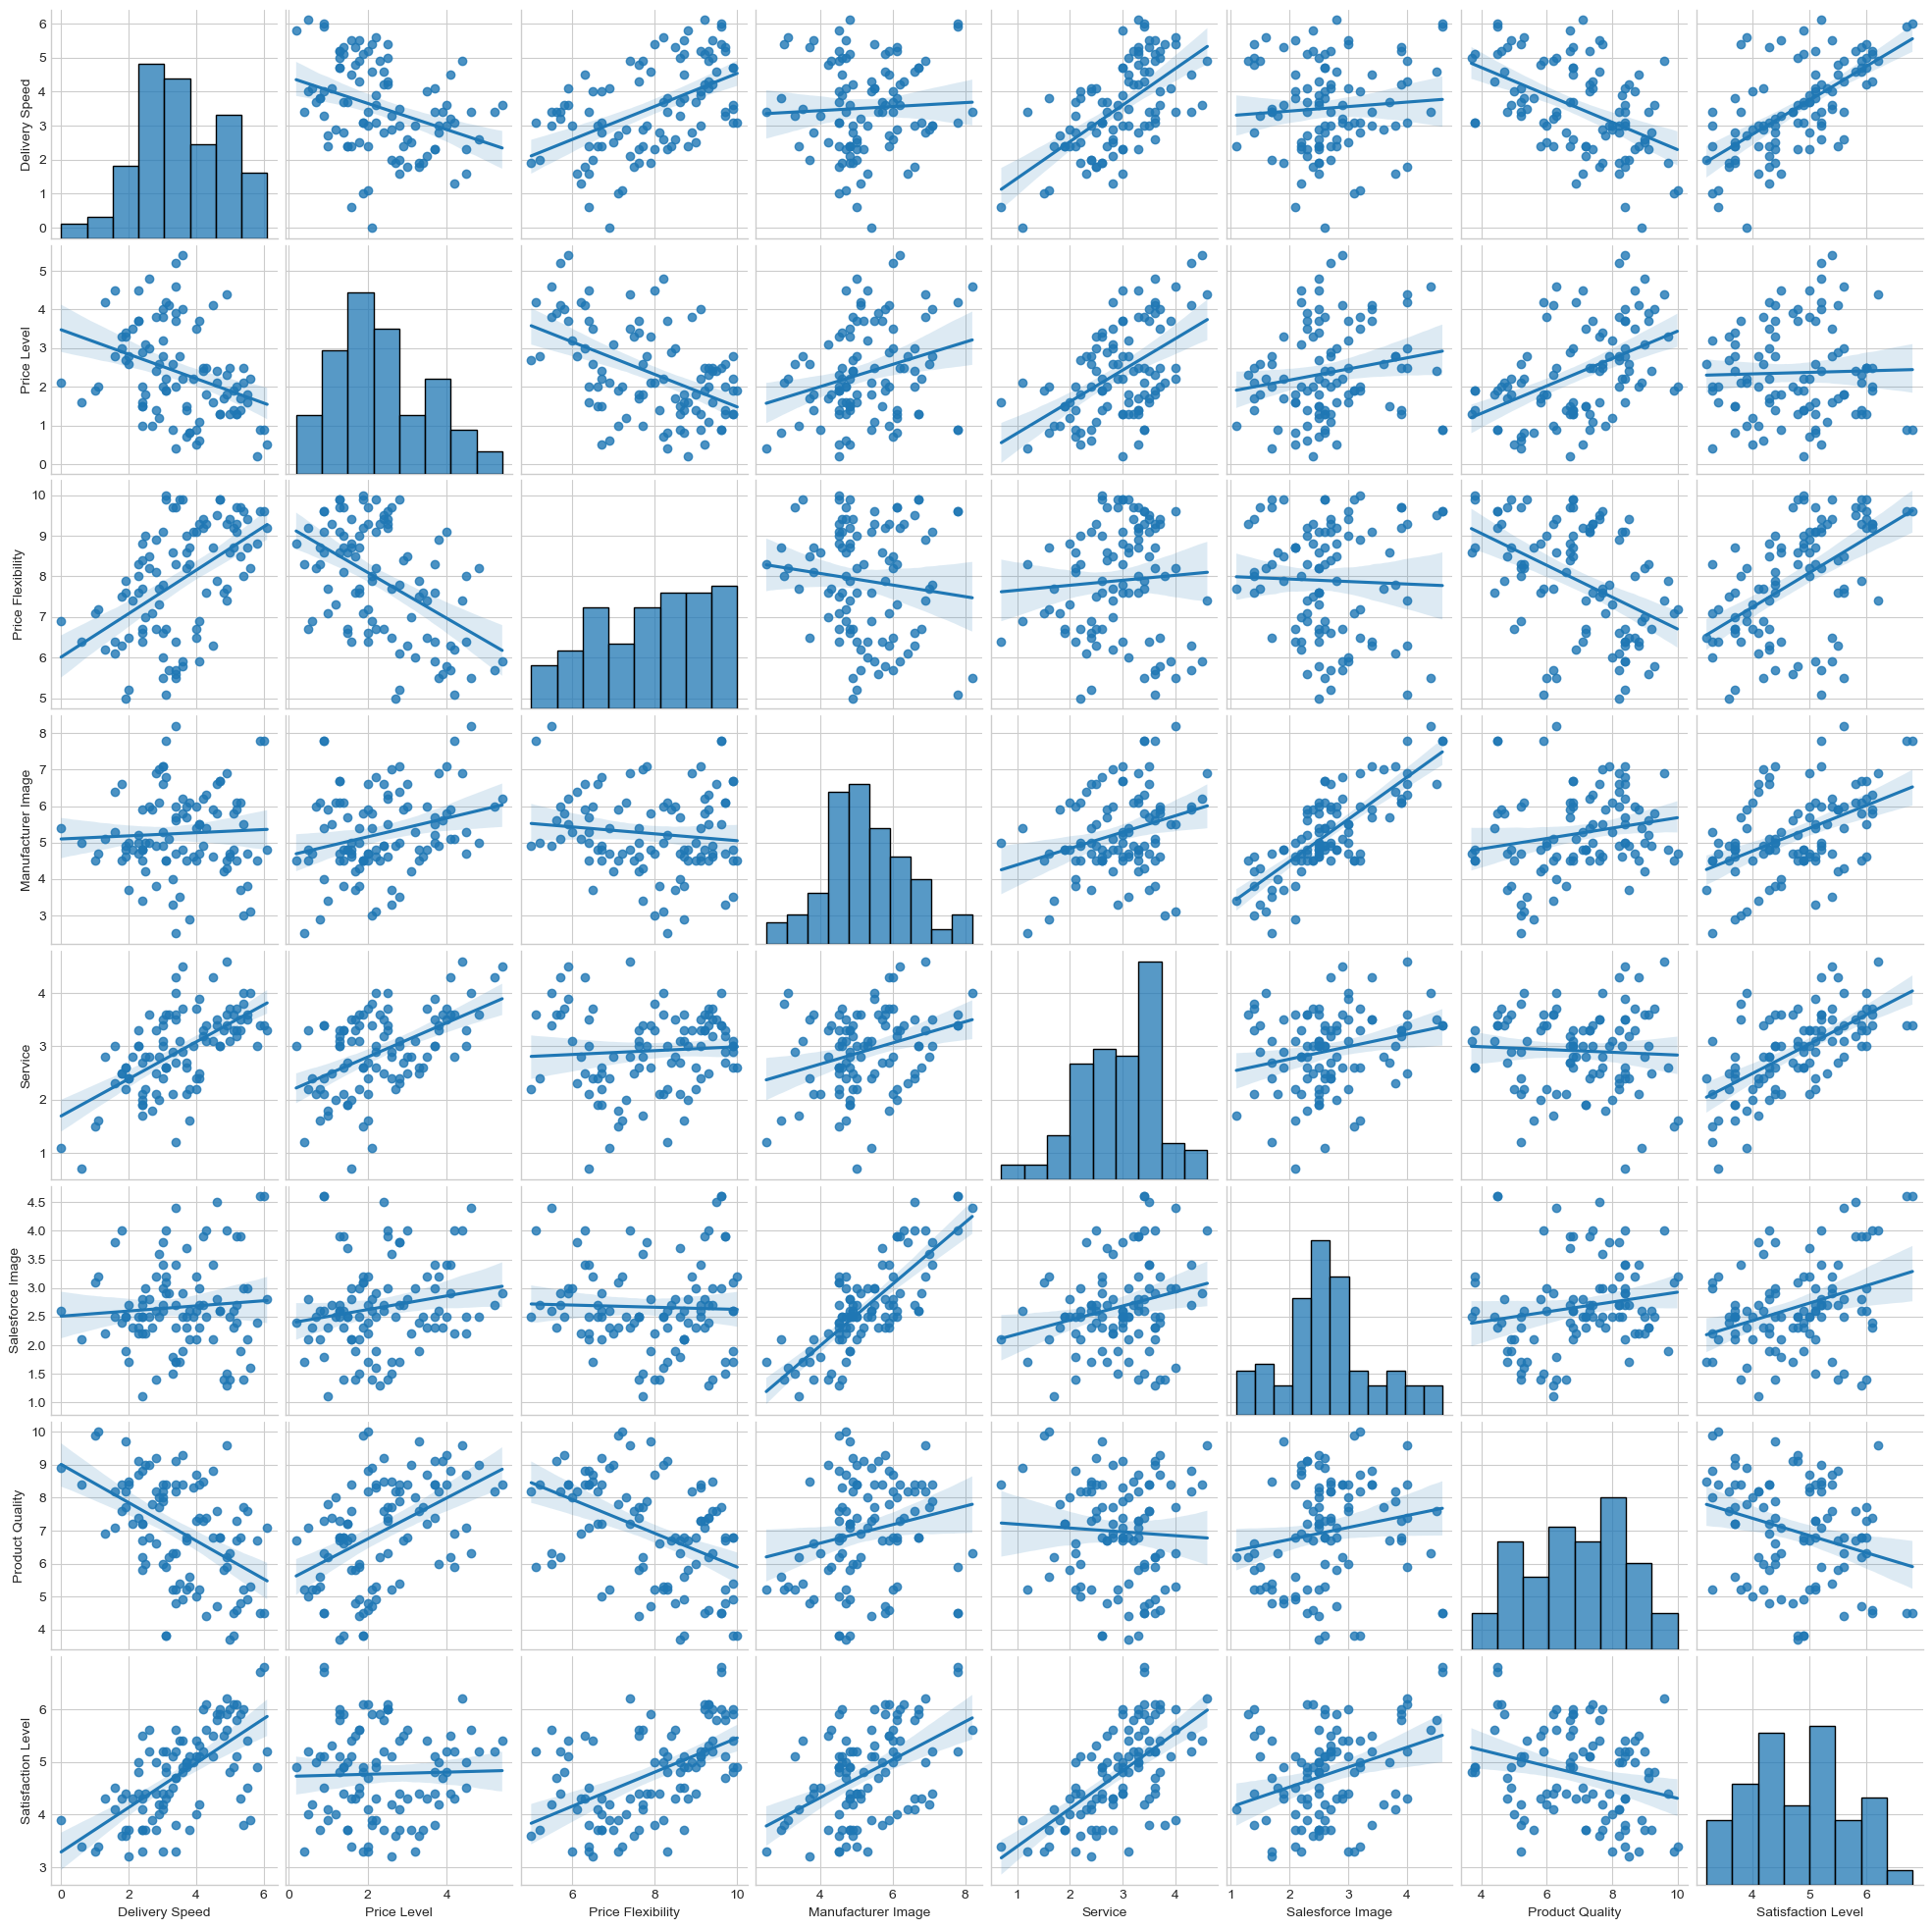

In [58]:
sns.pairplot(hatco1, kind='reg')

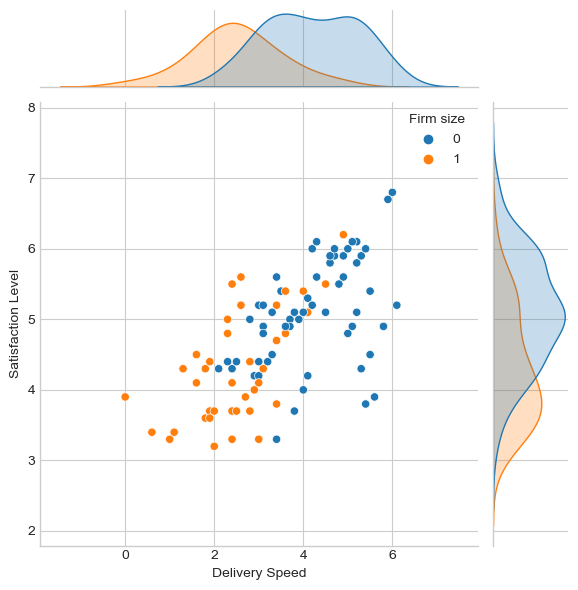

In [68]:
sns.jointplot(data=hatco, x='Delivery Speed', y='Satisfaction Level', hue='Firm size')

Are correlations with 'Satisfaction Level' significant?

In [63]:
for var in hatco1:
    hatco1_dropna = hatco1.dropna(subset=[var, 'Satisfaction Level'])
    print(var, pearsonr(hatco1_dropna['Satisfaction Level'], hatco1_dropna[var]))
                                          

Delivery Speed PearsonRResult(statistic=0.6506323301389191, pvalue=2.354357209803324e-13)
Price Level PearsonRResult(statistic=0.028394665880510234, pvalue=0.7791450989655391)
Price Flexibility PearsonRResult(statistic=0.5248141510750397, pvalue=2.0815396346392862e-08)
Manufacturer Image PearsonRResult(statistic=0.4759338314260012, pvalue=5.599028749180165e-07)
Service PearsonRResult(statistic=0.631232901641948, pvalue=1.917952074232071e-12)
Salesforce Image PearsonRResult(statistic=0.3409093027606839, pvalue=0.0005188847493396814)
Product Quality PearsonRResult(statistic=-0.28333980318451, pvalue=0.004282584841192087)
Satisfaction Level PearsonRResult(statistic=1.0, pvalue=0.0)


Correlations with 'Satisfaction Level' are significant except for 'Price Level'